# Buisness Problem

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Baseline Model

In [66]:
df = pd.read_csv('data/kc_house_data.csv')
y = df["price"]
X = df.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X, y)
# salecorr = train.corr()['price'].map(abs).sort_values(ascending=False)

0.0

In [ ]:
f = 'price ~ sqft_living'


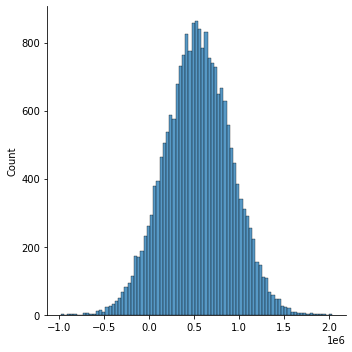

In [49]:
mean = train.price.mean()
std = train.price.std()
n = 21597
s = np.random.normal(mean, std, n)
sns.displot(s);

In [51]:
train['mean_price'] = mean

In [50]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,mean_price
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,...,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,540296.573506
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,...,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,540296.573506
19076,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,...,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,540296.573506
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,...,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880,540296.573506
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,...,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606,540296.573506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,Average,...,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088,540296.573506
21575,4140940150,10/2/2014,4,2.75,2770,3852,2.0,NO,NONE,Average,...,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641,540296.573506
5390,8658300480,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,Good,...,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500,540296.573506
860,1723049033,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,Average,...,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000,540296.573506


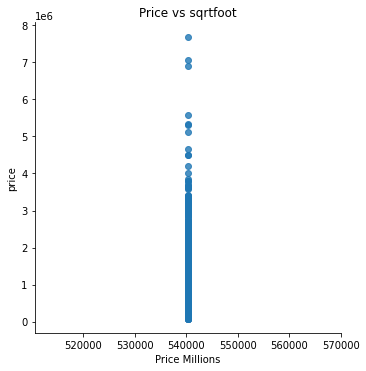

In [68]:
sns.lmplot(data=train, x='mean_price', y='price')
plt.xlabel('Price Millions')
plt.ylabel('price')
plt.title('Price vs sqrtfoot');

In [9]:
most_correlated_feature = 'sqft_living'
baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=trai n[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())



Train score:      0.48774659364870426
Validation score: 0.5024006604207556


In [10]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287


IndexError: index 3 is out of bounds for axis 0 with size 3

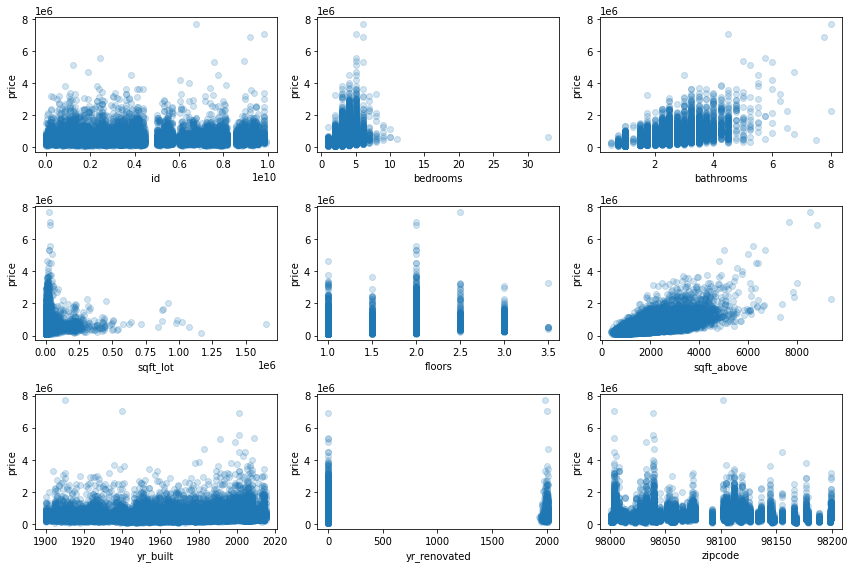

In [12]:
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [54]:
X_train_second_model = X_train_numeric.drop(['id', 'floors', 'yr_renovated', 'lat', 'long', 'yr_built', 'zipcode'], axis=1)

model = LinearRegression()
model.fit(X_train_second_model, y_train)


ValueError: Found input variables with inconsistent numbers of samples: [21597, 16197]

In [23]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())



Current Model
Train score:      0.514597102796556
Validation score: 0.5238497057019367

Baseline Model
Train score:      0.48774659364870426
Validation score: 0.5024006604207556


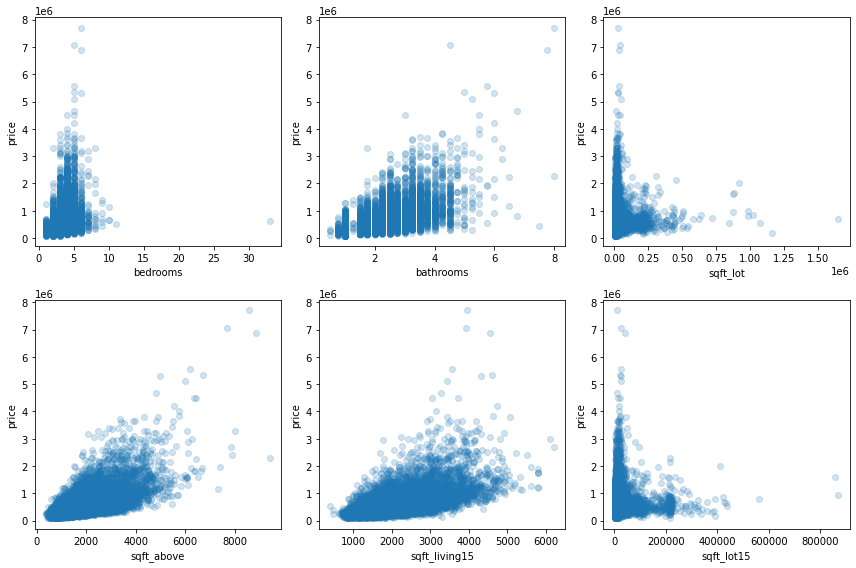

In [24]:
scatterplot_data = X_train_second_model.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_second_model[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")